In [1]:
import handcalcs.render

In [63]:
from typing import Iterable

def line_collide(line_1_coords: Iterable, line_2_coords: Iterable) -> tuple:
    """
    Line-Line Collision using the equation:


            (x1 - x3)(y3 - y4) - (y1 - y3)(x3 - x4)
        t = ─────────────────────────────────────────────
            (x1 - x2)(y3 - y4) - (y1 - y2)(x3 - x4)


              (x1 - x2)(y1 - y3) - (y1 - y2)(x1 - x3)
        u = - ─────────────────────────────────────────────
              (x1 - x2)(y3 - y4) - (y1 - y2)(x3 - x4)


        (Px, Py) = (x1 + t(x2 - x1), y1 + t(y2 - y1))
                             or
        (Px, Py) = (x3 + u(x4 - x3), y3 + u(y4 - y3))


    t and u are used to turn the infinite lines into line segments

    t and u can also be used to determine if there is a collision before calculating coords because:
        0.0 ≤ t ≤ 1.0
        0.0 ≤ u ≤ 1.0
    if t or u is outside of this range then there is no collision

    :param line_1_coords: (x1, y1, x2, y2)
    :param line_2_coords: (x3, y3, x4, y4)
    :return: Collision coords
    """
    # Unpacking argument iterable
    x1, y1, x2, y2 = line_1_coords
    x3, y3, x4, y4 = line_2_coords

    # Calculating t and u
    t = ((((x1 - x3) * (y3 - y4)) - ((y1 - y3) * (x3 - x4))) / (((x1 - x2) * (y3 - y4)) - ((y1 - y2) * (x3 - x4))))
    u = -((((x1 - x2) * (y1 - y3)) - ((y1 - y2) * (x1 - x3))) / (((x1 - x2) * (y3 - y4)) - ((y1 - y2) * (x3 - x4))))

    # Calculating intersection coords
    px = x1 + (t * (x2 - x1))
    py = y1 + (t * (y2 - y1))

    return (px, py) if 0.0 <= t <= 1.0 and 0.0 <= u <= 1.0 else False

In [61]:
%%render
#Long
x_1 = 45
y_1 = 62
x_2 = 209
y_2 = 264
x_3 = 53
y_3 = 279
x_4 = 240
y_4 = 83

t = (((x_1 - x_3) * (y_3 - y_4)) - ((y_1 - y_3) * (x_3 - x_4))) / (((x_1 - x_2) * (y_3 - y_4)) - ((y_1 - y_2) * (x_3 - x_4)))

u = -(((x_1 - x_2) * (y_1 - y_3)) - ((y_1 - y_2) * (x_1 - x_3))) / (((x_1 - x_2) * (y_3 - y_4)) - ((y_1 - y_2) * (x_3 - x_4)))

P_x = x_1 + (t * (x_2 - x_1))
P_y = y_1 + (t * (y_2 - y_1))


<IPython.core.display.Latex object>

In [62]:
%%render
if 0.0 <= t <= 1.0: cond_1 = True
elif 0.0 > t < 1.0: cond_1 = False
if 0.0 <= u <= 1.0: cond_2 = True
elif 0.0 > u < 1.0: cond_2 = False

cond = cond_1 and cond_2

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


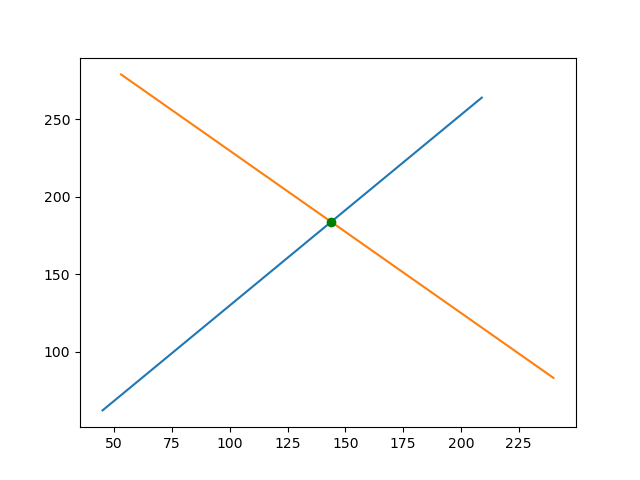

In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot([x_1, x_2], [y_1, y_2])
plt.plot([x_3, x_4], [y_3, y_4])
plt.plot(P_x, P_y, marker="o", color="green")
